# Shifted-tilted Tophat at Gaussian interference at waist

Applying first-order shift,tilt to tophat, integrate with HG00

\begin{equation}
	u_{n,m} \rightarrow
     u_{n,m}
        \left[
        1 - \frac{2 a }{w(z)^2} x + i k \alpha x - i \frac{2 k \alpha a}{w(z)^2} x^2 
    \right]
    + 
	a \frac{2 \sqrt{n}}{w(z)} 
	\exp(i \Psi(z))
	u_{n-1,m}
	\left[
        1+ i k \alpha x
    \right]	 \; .
\end{equation}

Scatter these with

\begin{align*}
\sum_{n,m} u_{n,m} \rightarrow 
	\sum_{n,m} 
	\lbrace &
		u_{n+2,m}[ X_+^2(-i\frac{2ka\alpha}{w^2})]
		\\+&
		u_{n+1,m}[ X_+^1(ik\alpha - \frac{2a}{w^2})]
		\\+&
		u_{n,m} [1+X_+^1(ik\alpha \frac{2a\sqrt{n}}{w} e^{i\Psi})- X_0^2 (i\frac{2ka\alpha}{w^2})]
		\\+&
		u_{n-1,m} [\frac{2a\sqrt{n}}{w} e^{i\Psi} + X_-^1(ik\alpha - \frac{2a}{w^2})]
		\\+&
		u_{n-2,m} [ X_-^1(ik\alpha a\frac{2\sqrt{n}}{w}e^{i\Psi}) - X_-^2 (i\frac{2ka\alpha}{w^2})] 	
	\rbrace
\end{align*}

In [1]:
import PauLisa as pl, PL_Plot as plplt, Tophat_integration_AW as th, numpy as np, matplotlib.pyplot as plt, cmath as cm

from numpy import pi as pi
from numpy import angle
from math import e
from numpy import sqrt as sqrt
from scipy.special import erf as erf
import mpmath as mp
import scipy.io

inf=np.inf

## Tophat coeffients from AW

In [2]:
mat = scipy.io.loadmat('Top_hat_for_paul.mat')
coef=mat['coeftop'].ravel()

Using simtools mode indexing in Python:

$
m = \frac{(N+1)(N+2)}{2}- (A_{python} + 1)
$

$
\rightarrow A_{python} =  \frac{(N+1)(N+2)}{2} + 1 -m 
$

$
n = A_{python} - \frac{N(N+1)}{2} = N-m
$

$
\rightarrow A_{python} = N-m + - \frac{N(N+1)}{2} 
$

$
N = floor( \frac{\sqrt{8A_{python}+1} - 1}{2} ) = ceil(\frac{\sqrt{9+8A_{python}} - 3}{2} )
$

In [3]:
def N_f(A):
    
    res = np.floor((np.sqrt(8*A+1)-1)/2)
    
    #res = (np.sqrt(9+8*A)-3)/2
    return(res)

def m(N,A):
    res = (N+1)*(N+2)/2 - (A+1)
    return(res)

#def n(N,A):
#    m= (N+1)*(N+2)/2 - (A+1)
#    res = N-m
#    return(res)
def n(N,A):
    res = A - (N*(N+1)/2)
    return(res)

NumberModes = int(len(coef))
listModesN = [None] * NumberModes
listModesM = [None] * NumberModes
listModesC = [None] * NumberModes



#for i in range(len(coef)):
#    A=i
#    N= N_f(A)
#
#    if (m(N,A)%2 == 0) & (n(N,A)%2 == 0):
#        print(coef[A], '\t\t\t' , m(N,A), ',' , n(N,A))

for i in range(NumberModes):
    A=i
    N= N_f(A)
    listModesN[i] = int(m(N,A))
    listModesM[i] = int(n(N,A))
    listModesC[i] = coef[i]
    
    

In [4]:
z=0
plane = pl.Plane(-2e-3, 2e-3, 300, -2e-3, 2e-3, 300)
params = pl.Params(1064e-9, 0.00023067,0)

modes = pl.create_modes(listModesM,listModesN,listModesC,NumberModes)
#modes18= pl.create_modes_order18(listModesM,listModesN,listModesC,NumberModes)
print(params)
print(plane)



wavelength=1.064e-06
w0=0.00023067
z0=0
Zr=0.15710516963503632
q0=0.15710516963503632j

xmin=-0.002,xmax=0.002,xpoints=300,x step size = 1.3333333333333333e-05
ymin=-0.002,ymax=0.002,ypoints=300,y step size = 1.3333333333333333e-05


In [5]:
a = 10e-6
alpha = 0


## Build Modes from coupling coefficients

In [6]:
#Apply scatter to create new modes

sc_modes = pl.scatter_case2_first_order(z,params,a,alpha,modes)



## Calculate tophat amp/phase and plot to check single shift/tilt 

In [7]:
f2 = pl.calculate(params,plane,sc_modes,z)

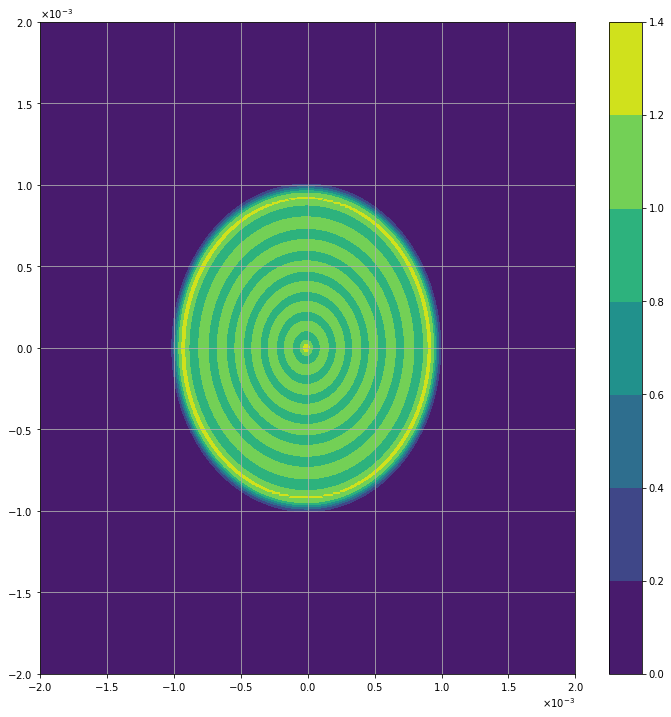

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(f2.plane.getX(), f2.plane.getY(), abs(f2.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.grid()

#plt.savefig("th_full_first_order.png")

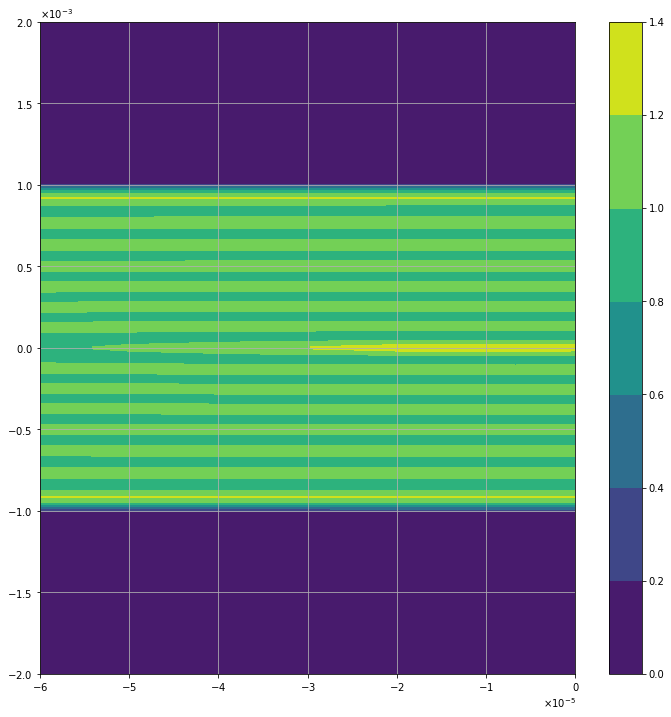

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))
cs = plt.contourf(f2.plane.getX(), f2.plane.getY(), abs(f2.getAmp() ** 2))

ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0), useMathText=True)

cbar = fig.colorbar(cs)

plt.xlim([-60e-6,0])

plt.grid()

#plt.savefig("th_zoom_first_order.png")

## Integration for signals

In [10]:
#initial int. params
Y = plane.getYmax() #Y int bound

Z = z

x_1R = 3e-4
x_2R = plane.getXmax() 

x_1L = plane.getXmin()
x_2L = -4e-4

w_1 = 1e-3
w_2 = 0.00023067

zR_1 = params.getZr()
zR_2 = params.getZr()

k_1 = params.getK()
k_2 = params.getK()

d_1 = z-params.getZ0()

W_2 = pl.w(z,params)

In [11]:
#loop through and sum over modes overlap where a,b -> n,m
def iterate_modes_overlap(w_1,w_2,zR_1,zR_2,k_1,k_2,d_1,W_2,x_1,x_2,Z,Y,modes_arr):    
    N = len(modes_arr)
    M = len(modes_arr[0])
    
    res = 0
    
    for a in range(N):
        for b in range(M):            
            #ignore zero coeff.
            if (modes_arr[a][b]!=0):
                c_nm = modes_arr[a][b]
                
                res += c_nm * th.overlap(a,b,w_1,w_2,zR_1,zR_2,k_1,k_2,d_1,W_2,x_1,x_2,Z,Y)  
                
    return(res)

In [12]:
points = 20

#array of arrays of modes (scattered tophats)
modes_arr = [0]*points

cl = [0]*points
cr = [0]*points
phi_l = [0]*points
phi_r = [0]*points
dws = [0]*points
lps = [0]*points


alpha_arr = np.linspace(-500e-6,500e-6,points)

for p in range (points):
    modes_arr[p] = pl.scatter_case2_first_order(z,params,a,alpha_arr[p],modes) #array of array of scattered modes
    
    
    cl[p] = iterate_modes_overlap(w_1,w_2,zR_1,zR_2,k_1,k_2,d_1,W_2,x_1L,x_2L,Z,Y,modes_arr[p]) # left overlap (-2e-3,0)
    cr[p] = iterate_modes_overlap(w_1,w_2,zR_1,zR_2,k_1,k_2,d_1,W_2,x_1R,x_2R,Z,Y,modes_arr[p]) # right overlap (0,2e-3)
    
    phi_l[p] = angle(cl[p])
    phi_r[p] = angle(cr[p])
    
    dws[p] = phi_r[p]-phi_l[p]
    lps[p] = 0.5*(phi_r[p]+phi_l[p])

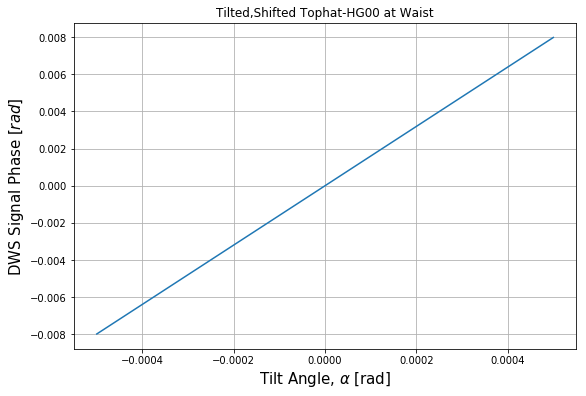

In [13]:
plt.figure(figsize=(9,6))
plt.plot(alpha_arr, dws)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'DWS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'Tilted,Shifted Tophat-HG00 at Waist') 

plt.grid()

#plt.savefig("4-23_th_dws.png")

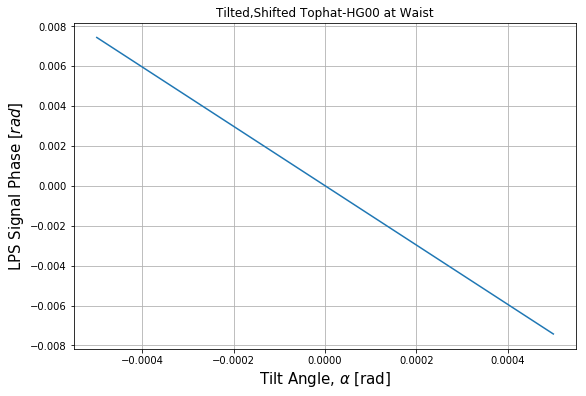

In [14]:
plt.figure(figsize=(9,6))
plt.plot(alpha_arr, lps)

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + 'rad]', fontsize=15) 
plt.ylabel(r'LPS Signal Phase $[' +  'rad]$', fontsize=15) 
plt.title(r'Tilted,Shifted Tophat-HG00 at Waist') 

plt.grid()

#plt.savefig("4-23_th_lps.png")